#### AIM OF THE PROJECT IS TO TEST THE DEGREE OF EFFECTIVENESS OF VARIOUS MACHINE LEARNING ALGORITHMS IN PREDICTION OF 'RINGS' ABALONE FEATURE

In [ ]:
import pandas as pd
import numpy as np

data_train = pd.read_csv("C:/Users/Uzytkownik/Desktop/Kaggle competitions/Regression with an Abalone Dataset/train.csv")
data_test = pd.read_csv("C:/Users/Uzytkownik/Desktop/Kaggle competitions/Regression with an Abalone Dataset/test.csv")

#### PRINTING DATA_TRAIN

In [466]:
data_train

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


#### PRINTING DATA_TEST

In [467]:
data_test

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...,...
60406,151021,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,151022,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,151023,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,151024,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


#### CHECKING FOR DUPLICATES

In [468]:
amount_duplicated_values_train = data_train.duplicated().sum()
amount_duplicated_values_test = data_test.duplicated().sum()

percentage_duplicated_values_train = amount_duplicated_values_train/len(data_train)
percentage_duplicated_values_test = amount_duplicated_values_test/len(data_test)

print("Amount of duplicated observations in train dataset: {}".format(amount_duplicated_values_train))
print("Amount of duplicated observations in test dataset: {}".format(amount_duplicated_values_test))

print("% of duplicated observations in train dataset: {}".format(percentage_duplicated_values_train))
print("% of duplicated observations in test dataset: {}".format(percentage_duplicated_values_test))

Amount of duplicated observations in train dataset: 0
Amount of duplicated observations in test dataset: 0
% of duplicated observations in train dataset: 0.0
% of duplicated observations in test dataset: 0.0


#### PRINTING DATA_TRAIN INFO

In [469]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


#### PRINTING DATA_TEST INFO

In [470]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


#### PLOTTING DISTRIBUTION OF 'RINGS' FEATURE

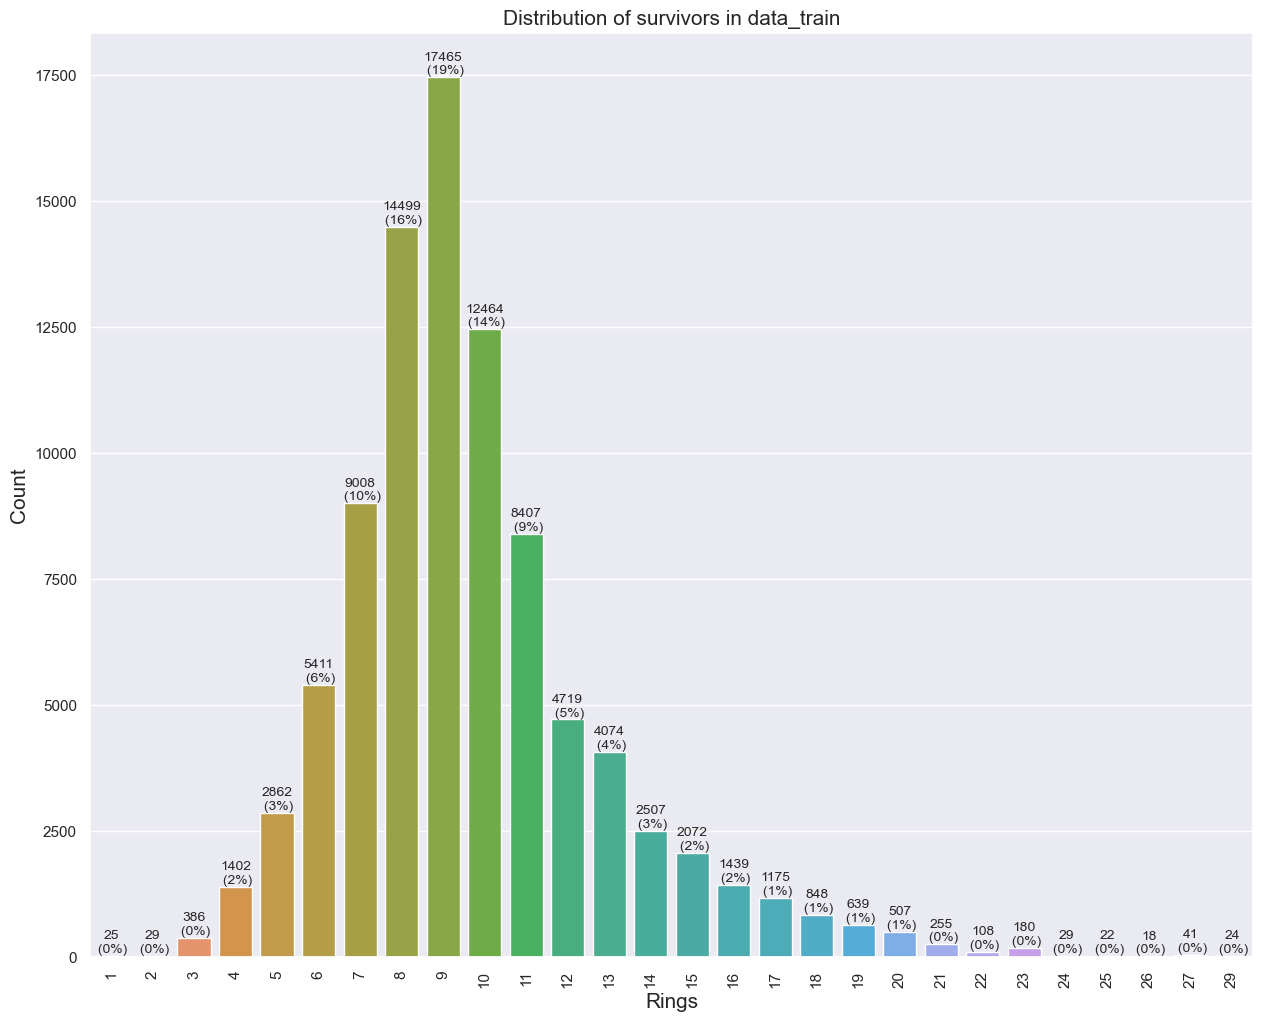

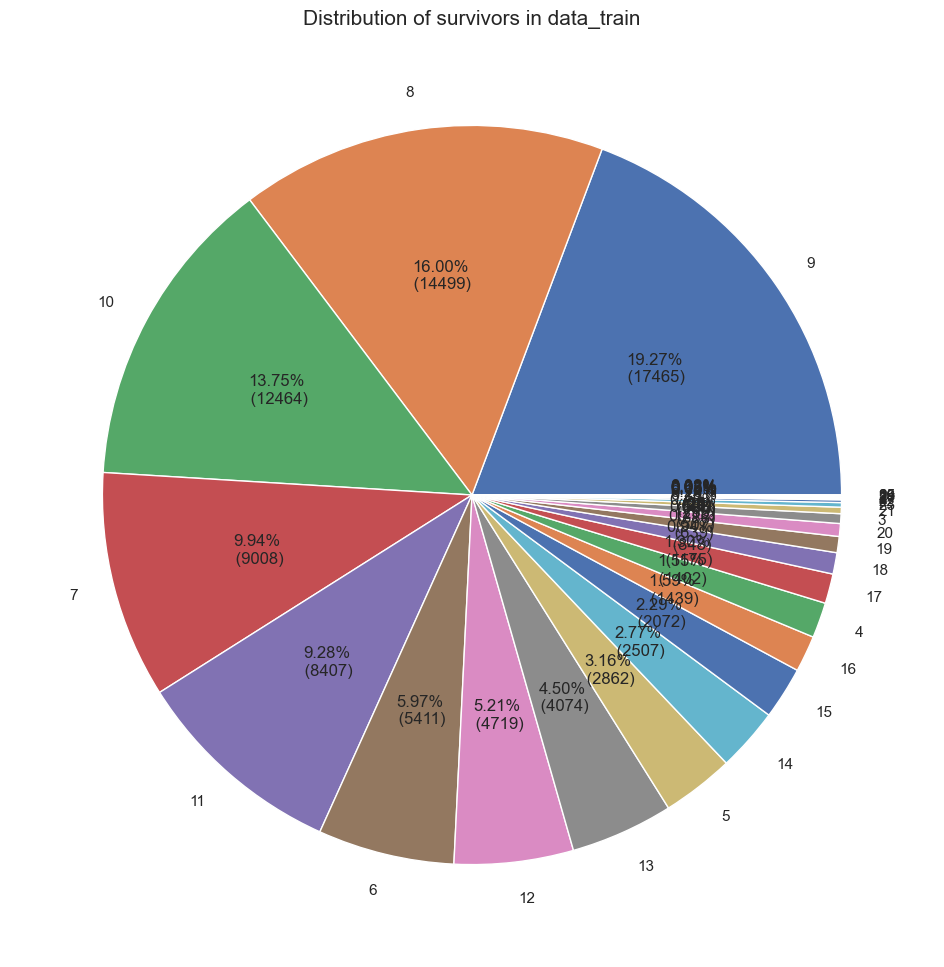

In [471]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

absolute_values = data_train['Rings'].value_counts().sort_index()
relative_values = data_train['Rings'].value_counts(ascending=False, normalize=True).sort_index().values * 100
bar_labels = [f'{values[0]}\n ({values[1]:.0f}%)' for values in zip(absolute_values, relative_values)]

plt.subplots(figsize=(15, 12))
ax = sns.barplot(x=data_train['Rings'].value_counts().index, 
                 y=data_train['Rings'].value_counts(), errorbar=None)
ax.bar_label(ax.containers[0], 
             fontsize=10, 
             labels=bar_labels)
plt.xticks(rotation='vertical')
plt.xlabel('Rings', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of survivors in data_train', fontsize=15)
plt.show()


plt.subplots(figsize=(15, 12))
plt.pie(x=data_train['Rings'].value_counts(), 
        explode=None,
        labels=data_train['Rings'].value_counts().index, 
        autopct= lambda value: '{:.2f}%\n ({:.0f})'.format(value,(value/100)*absolute_values.sum()))
plt.title('Distribution of survivors in data_train', fontsize=15)
plt.show()

#### PLOTTING HISTOGRAM OF 'LENGTH' FEATURE

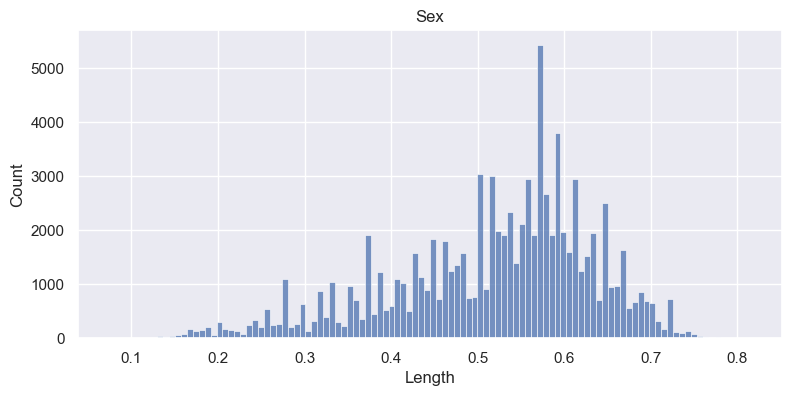

In [472]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Length')
plt.title('Sex')
plt.show()

#### PLOTTING HISTOGRAM OF 'DIAMETER' FEATURE

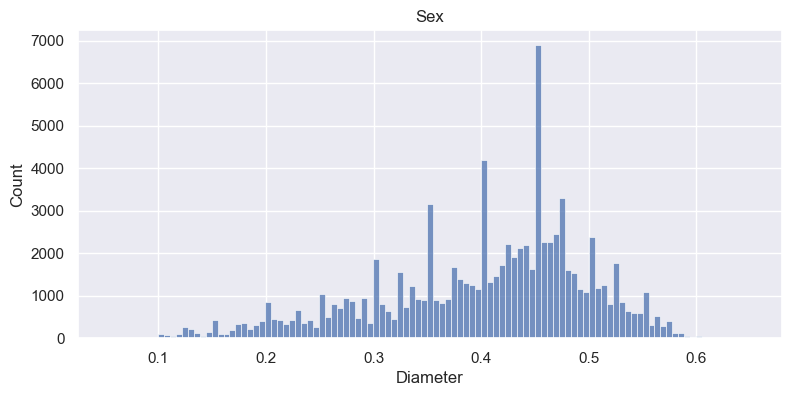

In [473]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Diameter')
plt.title('Sex')
plt.show()

#### PLOTTING HISTOGRAM OF 'HIEGHT' FEATURE

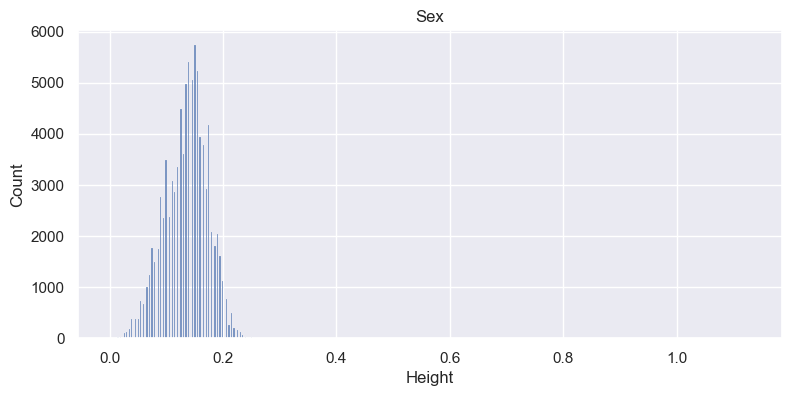

In [474]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Height')
plt.title('Sex')
plt.show()

#### PLOTTING HISTOGRAM OF 'WHOLE WEIGHT' FEATURE

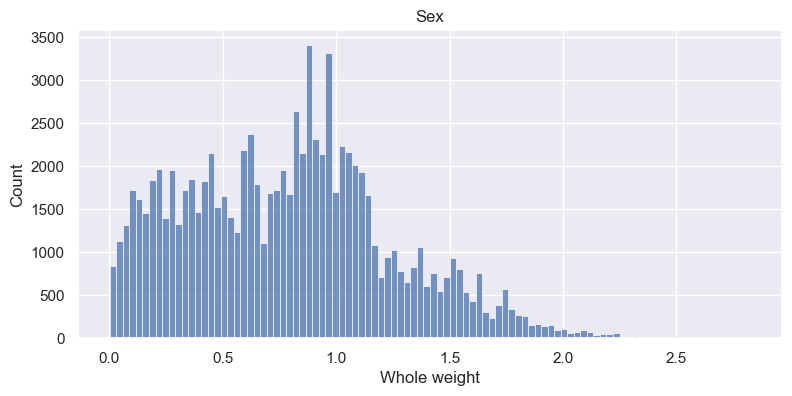

In [475]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Whole weight')
plt.title('Sex')
plt.show()

#### PLOTTING HISTOGRAM OF 'WHOLE WIEGHT.1' FEATURE

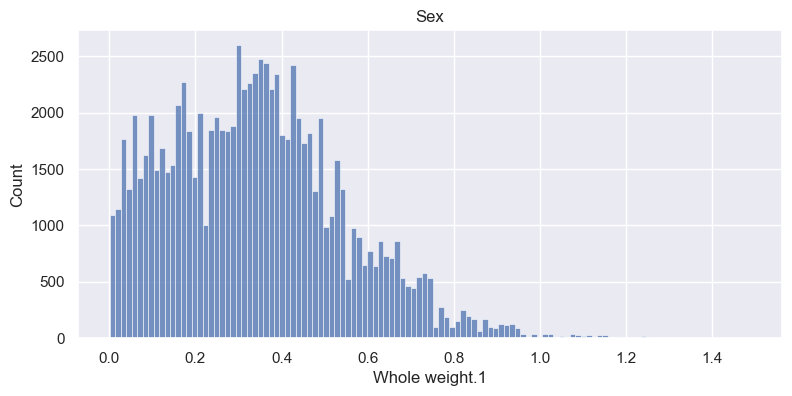

In [476]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Whole weight.1')
plt.title('Sex')
plt.show()

#### PLOTTING HISTOGRAM OF 'WHOLE WEIGHT.2' FEATURE

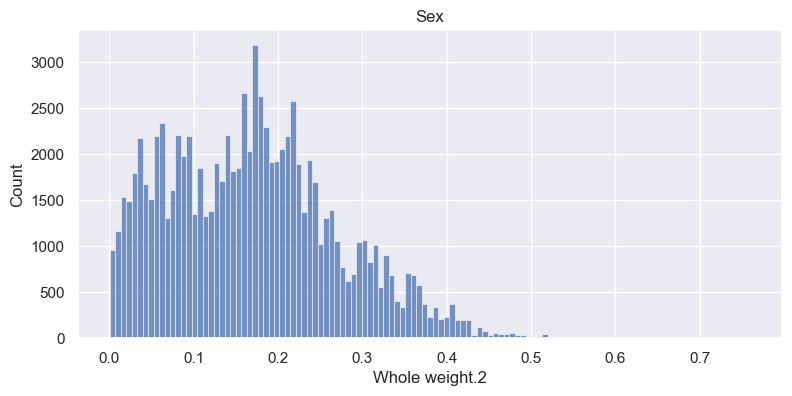

In [477]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Whole weight.2')
plt.title('Sex')
plt.show()

#### PLOTTING HISTOGRAM OF 'SHELL WEIGHT' FEATURE

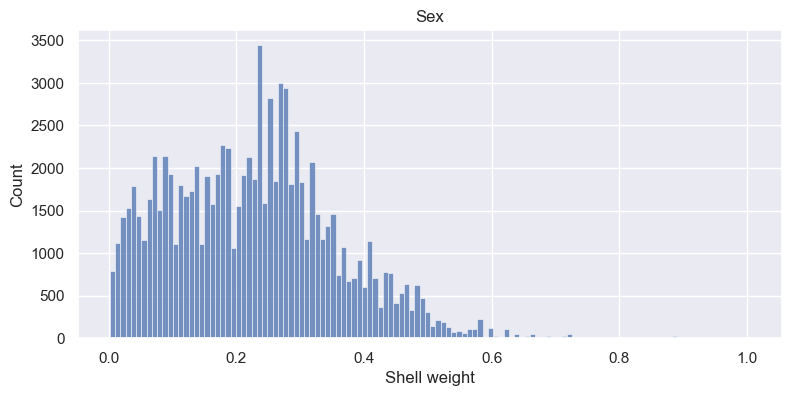

In [478]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Shell weight')
plt.title('Sex')
plt.show()

#### PLOTTING SCATTERPLOT OF 'LENGTH' FEATURE IN RELATION TO 'RINGS' FEATURE

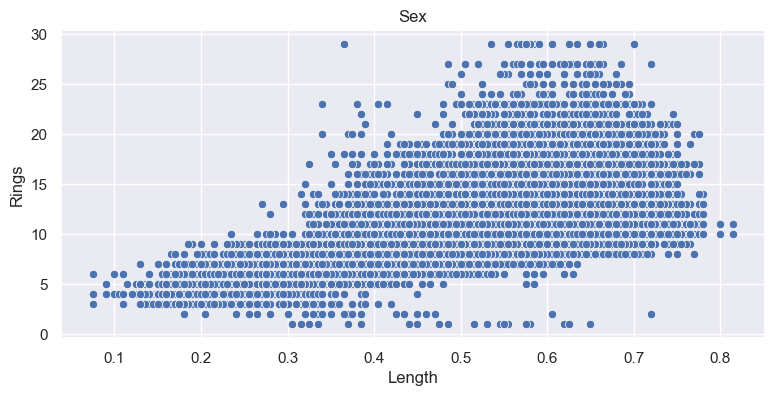

In [479]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.scatterplot(data=data_train,
             x='Length',
             y='Rings')
plt.title('Sex')
plt.show()

#### PLOTTING SCATTERPLOT OF 'DIAMETER' FEATURE IN RELATION TO 'RINGS' FEATURE

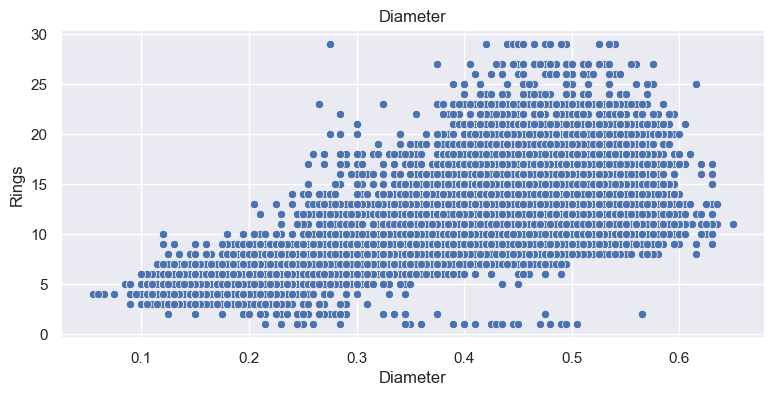

In [480]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.scatterplot(data=data_train,
             x='Diameter',
             y='Rings')
plt.title('Diameter')
plt.show()

#### PLOTTING SCATTERPLOT OF 'HEIGHT' FEATURE IN RELATION TO 'RINGS' FEATURE

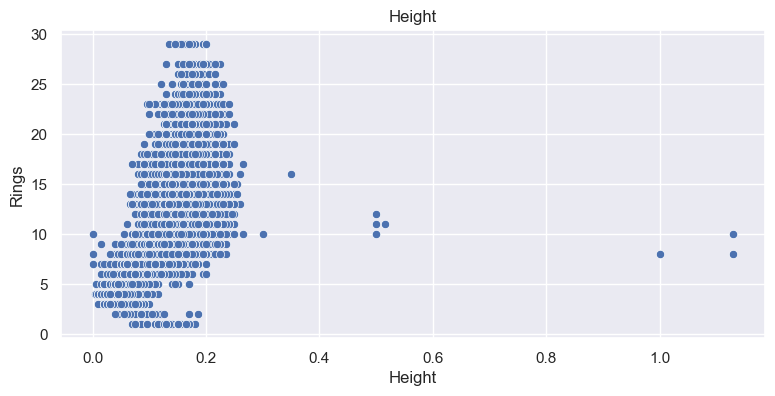

In [481]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.scatterplot(data=data_train,
             x='Height',
             y='Rings')
plt.title('Height')
plt.show()

#### PLOTTING SCATTERPLOT OF 'WHOLE WEIGHT' FEATURE IN RELATION TO 'RINGS' FEATURE

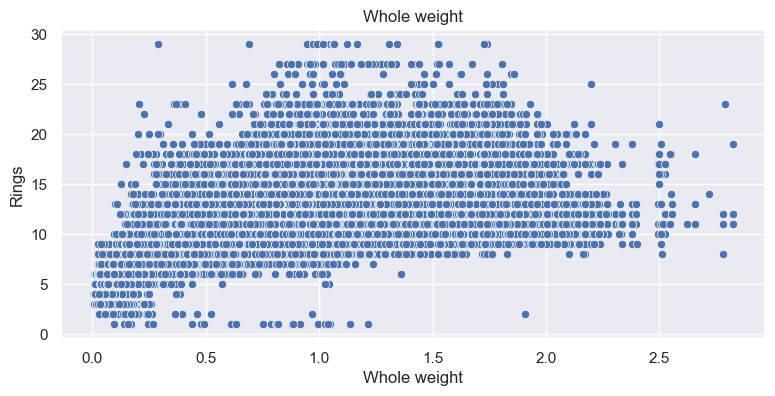

In [482]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.scatterplot(data=data_train,
             x='Whole weight',
             y='Rings')
plt.title('Whole weight')
plt.show()

#### PLOTTING SCATTERPLOT OF 'WHOLE WEIGHT.1' FEATURE IN RELATION TO 'RINGS' FEATURE

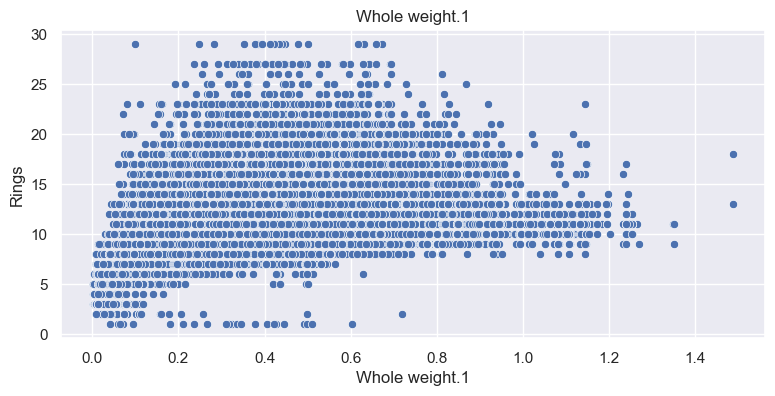

In [483]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.scatterplot(data=data_train,
             x='Whole weight.1',
             y='Rings')
plt.title('Whole weight.1')
plt.show()

#### PLOTTING SCATTERPLOT OF 'WHOLE WEIGHT.2' FEATURE IN RELATION TO 'RINGS' FEATURE

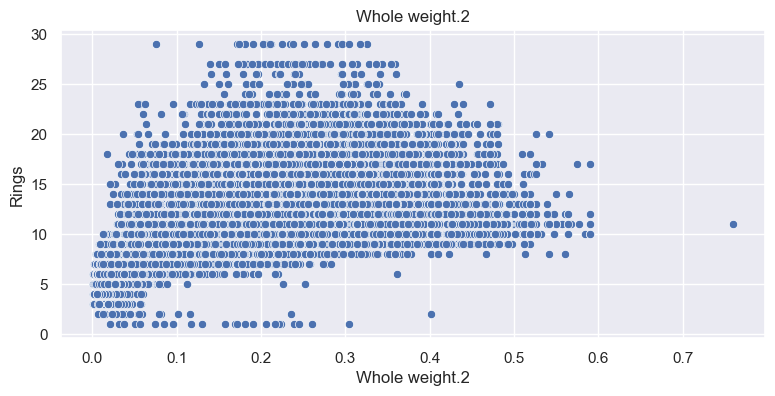

In [484]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.scatterplot(data=data_train,
             x='Whole weight.2',
             y='Rings')
plt.title('Whole weight.2')
plt.show()

#### PLOTTING SCATTERPLOT OF 'SHELL WEIGHT' FEATURE IN RELATION TO 'RINGS' FEATURE

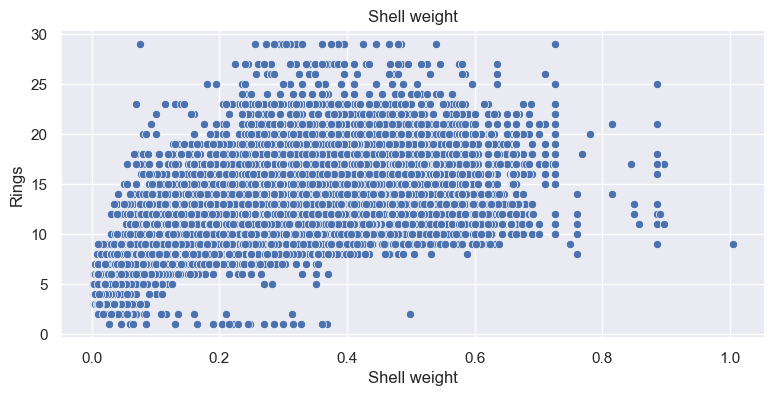

In [485]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.scatterplot(data=data_train,
             x='Shell weight',
             y='Rings')
plt.title('Shell weight')
plt.show()

#### CONVERTING CATEGORICAL FEATURES INTO NUMERIC FEATURES

In [486]:
data_train_sex_dummies = pd.get_dummies(data_train['Sex'], drop_first = True, dtype='int')

data_test_sex_dummies = pd.get_dummies(data_test['Sex'], drop_first = True, dtype='int')

#### CREATING DATASET

In [487]:
dataset = [data_train, data_test]

#### DELETING 'ID' AND 'SEX' FEATURES

In [ ]:
for data in dataset:
    del data['id']
    del data['Sex']

#### JOINING CONVERTED FEATURES WITH REST OF DATASET

In [489]:
data_train = pd.concat([data_train, data_train_sex_dummies], axis= 1)

data_test = pd.concat([data_test, data_test_sex_dummies], axis= 1)

#### PLOTTING CORRELATION PLOT

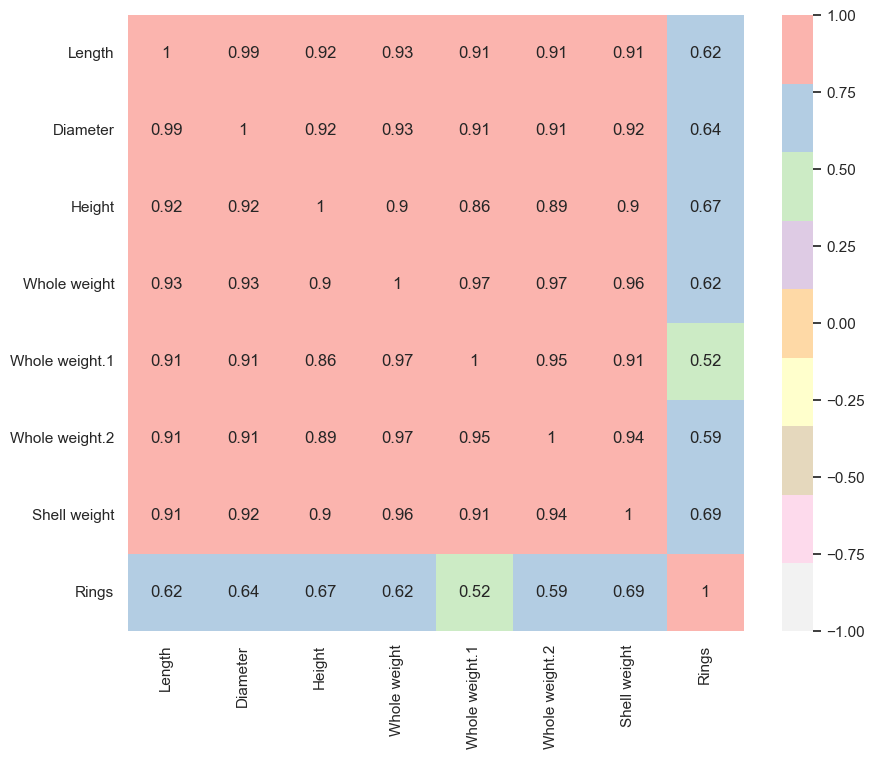

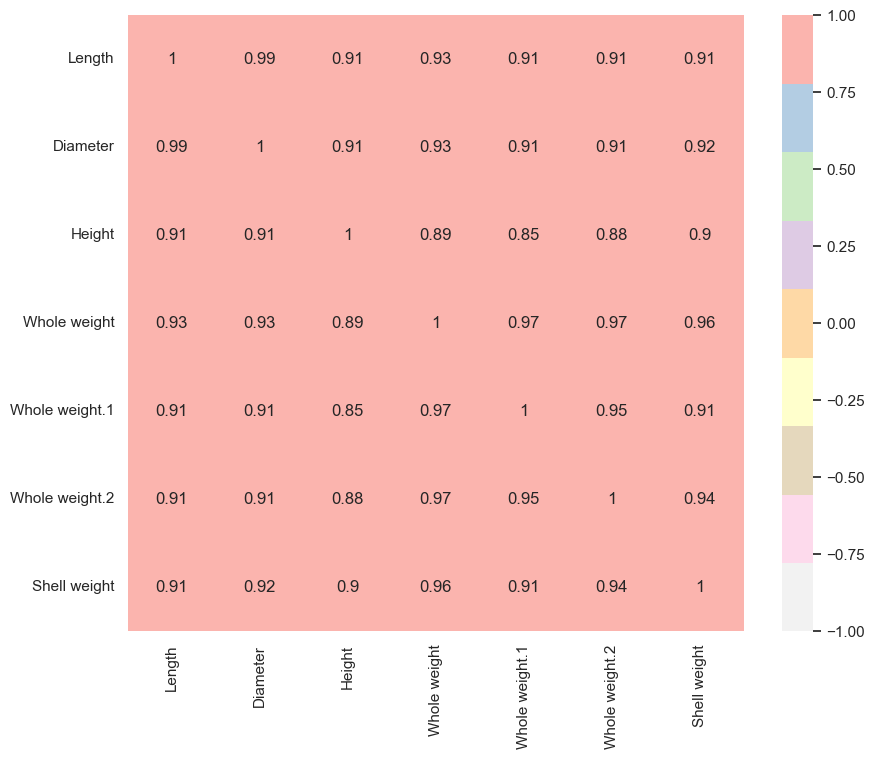

In [490]:
for data in dataset:
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data.corr(),
                cmap='Pastel1_r',
                annot= True,
                fmt='.2g',
                vmin=-1.0,
                vmax=1.0,
                square=True,
                ax=ax)

#### PRINTING DATA_TRAIN

In [ ]:
data_train

#### DEFINING X AND Y

In [492]:
X = data_train.drop('Rings', axis= 1)
y = data_train['Rings']

X_test = data_test

#### TRAIN-TEST SPLIT

In [493]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

#### CREATING PLOT OF FEATURE IMPORTANCE

Feature: 0, Score: 0.04220
Feature: 1, Score: 0.03773
Feature: 2, Score: 0.03933
Feature: 3, Score: 0.08591
Feature: 4, Score: 0.14164
Feature: 5, Score: 0.06590
Feature: 6, Score: 0.57212
Feature: 7, Score: 0.00788
Feature: 8, Score: 0.00729


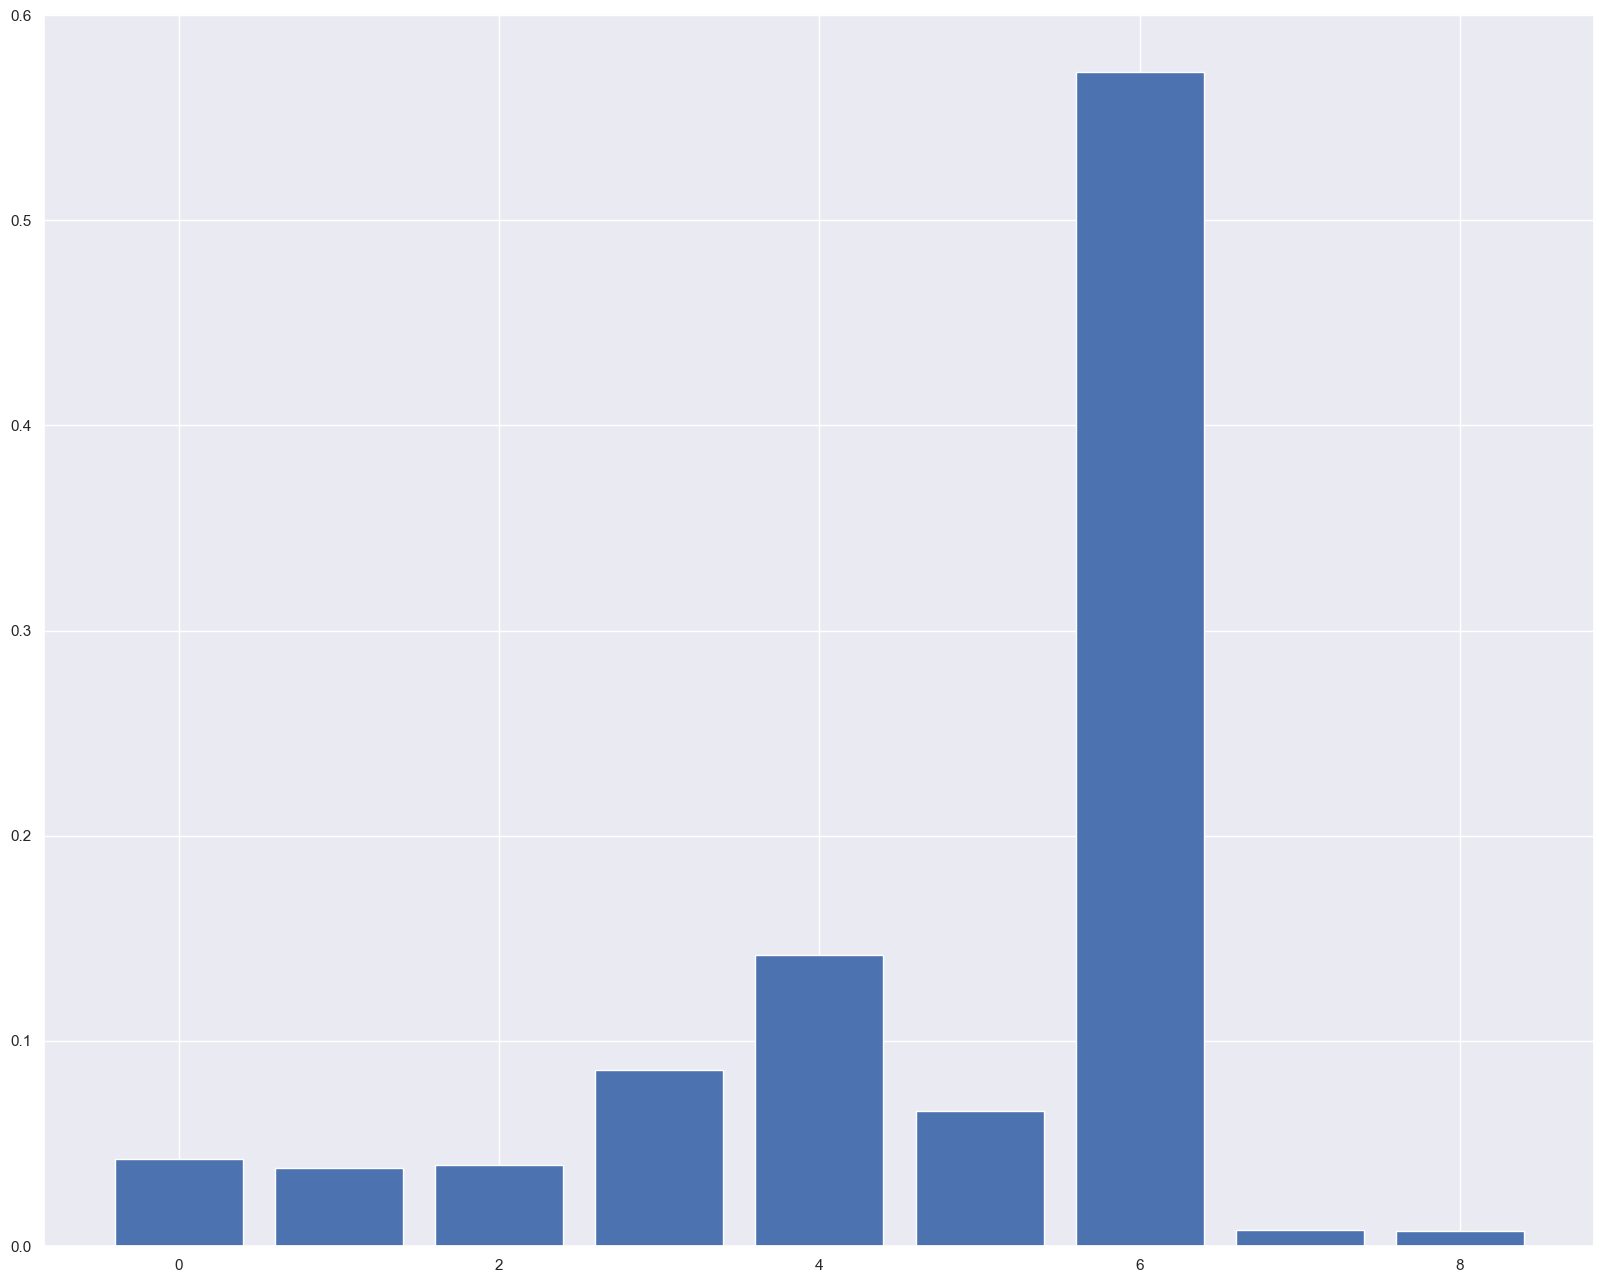

In [494]:
import matplotlib.pyplot as plt

model = DecisionTreeRegressor()
# fit the model
model.fit(X_train.values,y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### DELETING NON-IMPORTANT FEATURES FROM DATASET

In [ ]:
dataset = [data_train, data_test]

for data in dataset:
    del data['Length']
    del data['Diameter']
    del data['Height']
    del data['Whole weight']
    del data['Whole weight.1']
    del data['Whole weight.2']

#### PLOTTING CORRELATION PLOT

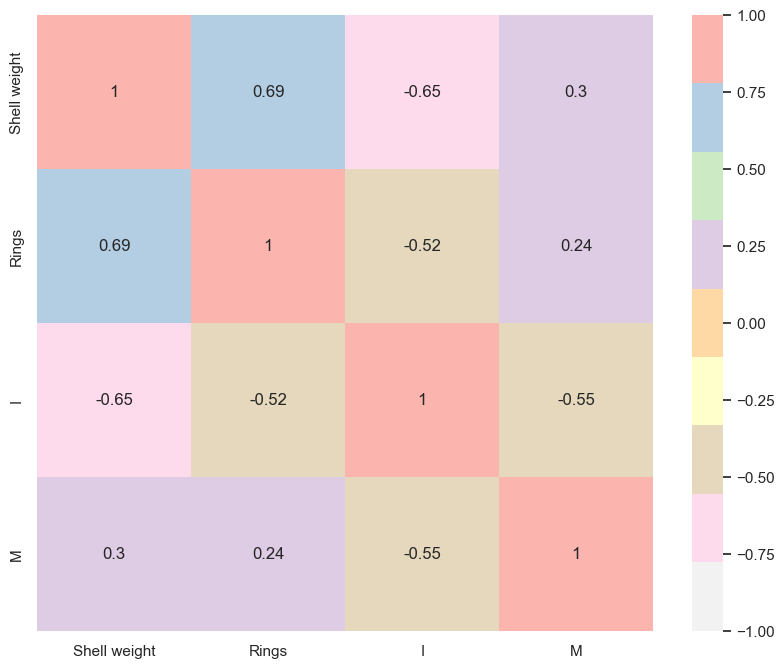

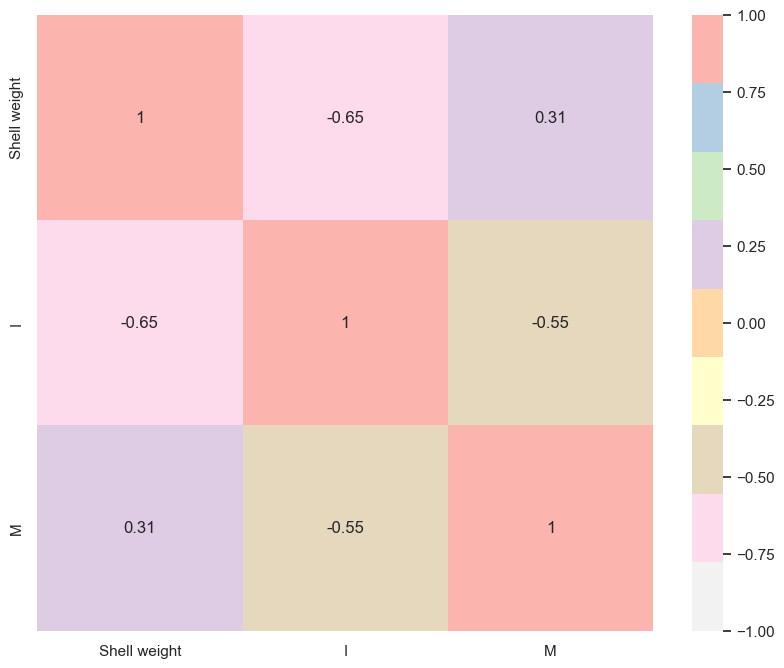

In [497]:
for data in dataset:
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data.corr(),
                cmap='Pastel1_r',
                annot= True,
                fmt='.2g',
                vmin=-1.0,
                vmax=1.0,
                square=True,
                ax=ax)

#### DEFINING X AND Y

In [498]:
X = data_train.drop('Rings', axis= 1)
y = data_train['Rings']

X_test = data_test

#### TRAIN-TEST SPLIT

In [499]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

#### DEFINING CROSS VALIDATION

In [500]:
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=None)

#### CREATING LIST WITH ALL MODELS

In [501]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline

models = [
    make_pipeline(RobustScaler(), LinearRegression()),
    KNeighborsRegressor(),
    DecisionTreeRegressor(), 
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    AdaBoostRegressor()
]

#### FITTING ALL MODELS TO DATA AND PRINTING NMSLE SCORES

In [502]:
from sklearn.model_selection import cross_validate

model_name = []
train_score = []
val_score = []

for model in models:
    model.fit(X_train.values,y_train)
    score = cross_validate(model, X_train.values, y_train, cv=kfold, scoring='neg_mean_squared_log_error', return_train_score=True)
    model_name.append(type(model).__name__)
    train_score.append(score['train_score'].mean())
    val_score.append(score['test_score'].mean())
    print(type(model).__name__)
    print(score['train_score'].mean())
    print(score['test_score'].mean())

Pipeline
-0.0343222650823511
-0.03433261612084502
KNeighborsRegressor
-0.03263526146864685
-0.03427166283461914
DecisionTreeRegressor
-0.027044896859649985
-0.02931372695096058
RandomForestRegressor
-0.02710343831744263
-0.02913084289653654
GradientBoostingRegressor
-0.030183984989359446
-0.030393801180993663
ExtraTreesRegressor
-0.027044896859649992
-0.029272843851253304
AdaBoostRegressor
-0.0581507204693783
-0.05814578691619258


#### CREATING DATAFRAME WITH ALL MODELS NAMES AND SCORES

In [503]:
overview = pd.concat([pd.DataFrame(model_name).rename(columns={pd.DataFrame(model_name).columns[0]: 'Model name'}), 
                      pd.DataFrame(train_score).rename(columns={pd.DataFrame(train_score).columns[0]: 'RMSLEs score train'}), 
                      pd.DataFrame(val_score).rename(columns={pd.DataFrame(val_score).columns[0]: 'RMSLEs score test'})], 
                      axis=1)

overview

,Model name,RMSLEs score train,RMSLEs score test
0,Pipeline,-0.034322,-0.034333
1,KNeighborsRegressor,-0.032635,-0.034272
2,DecisionTreeRegressor,-0.027045,-0.029314
3,RandomForestRegressor,-0.027103,-0.029131
4,GradientBoostingRegressor,-0.030184,-0.030394
5,ExtraTreesRegressor,-0.027045,-0.029273
6,AdaBoostRegressor,-0.058151,-0.058146


#### CONVERTING SCORES TO RMSLE

In [504]:
from numpy import sqrt
    
accurate_scores = overview[['RMSLEs score train', 'RMSLEs score test']].apply(lambda x: sqrt(-x))

#### DELETING FEATURES

In [505]:
del overview['RMSLEs score train']
del overview['RMSLEs score test']

overview

,Model name
0,Pipeline
1,KNeighborsRegressor
2,DecisionTreeRegressor
3,RandomForestRegressor
4,GradientBoostingRegressor
5,ExtraTreesRegressor
6,AdaBoostRegressor


#### JOINING RMSLE SCORES TO DATAFRAME WITH MODEL NAMES

In [506]:
pd.concat([overview, accurate_scores], axis=1)

,Model name,RMSLEs score train,RMSLEs score test
0,Pipeline,0.185263,0.185291
1,KNeighborsRegressor,0.180652,0.185126
2,DecisionTreeRegressor,0.164453,0.171213
3,RandomForestRegressor,0.164631,0.170678
4,GradientBoostingRegressor,0.173735,0.174338
5,ExtraTreesRegressor,0.164453,0.171093
6,AdaBoostRegressor,0.241145,0.241134
